## Simple Linear Regression task:

### In this regression task we will predict the percentage of marks that a student is expected to score based upon   the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Reading the dataset from the url given
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


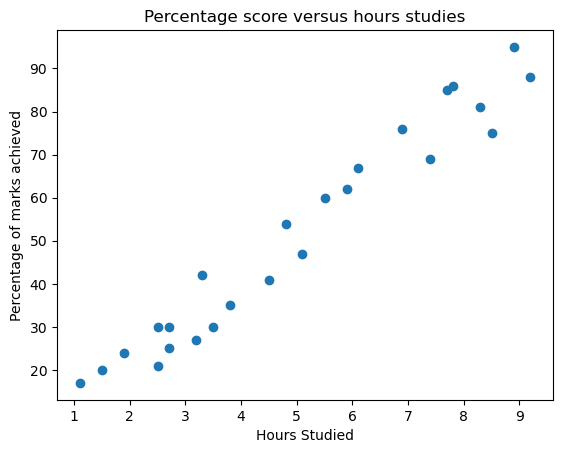

In [10]:
# Plotting the data points on 2-D graph to get the idea of relationship between the variables
plt.plot(df["Hours"], df["Scores"], "o")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of marks achieved")
plt.title("Percentage score versus hours studies")
plt.show()

### From the above graph it is clear that there is a positive relationship between the number of hours studied and percentage of marks obtained.

### Preparing the data

In [15]:
X = df[['Hours']].values
y = df[['Scores']].values

### Splitting the data into train set and test set using Scikit learn's train_test_split method:

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 54)

### Training the Linear regression algorithm with training dataset

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training complete")

Training complete


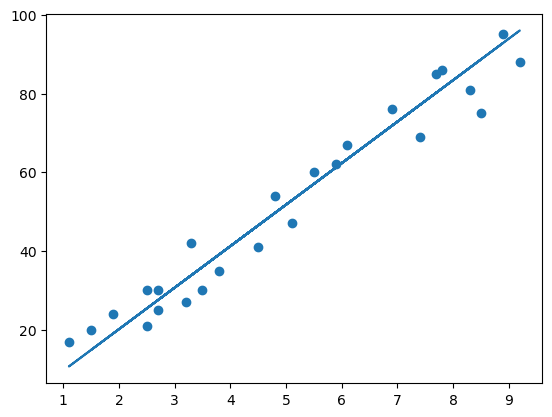

In [19]:
# Plotting the regression line
line = lr.coef_*X + lr.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### Making predictions

In [20]:
print(X_test)
y_pred = lr.predict(X_test) # Predicting the scores

[[6.9]
 [8.3]
 [3.8]
 [8.5]
 [2.7]
 [3.3]
 [7.4]
 [1.1]]


In [28]:
# Comparing actual versus predicted
compare = pd.DataFrame({"Actual": y_test.reshape(-1), "Predicted": y_pred.reshape(-1)})
compare

,Actual,Predicted
0,76,71.780003
1,81,86.531887
2,35,39.115116
3,75,88.639299
4,30,27.524350
5,42,33.846586
6,69,77.048533
7,17,10.665053


In [36]:
# Predicting score when a student studied for 9.25 hrs/day
hours = np.array(9.25).reshape(1,-1)
pred_score = lr.predict(hours)

print("No. of Hours = {}".format(hours))
print("Predicted score = {}".format(pred_score))

No. of Hours = [[9.25]]
Predicted score = [[96.54209466]]


### Evaluating the performance of the model

In [39]:
# Using mean of the residual method. It should be close to zero

residuals = y_test - y_pred
mean_residuals = np.mean(residuals)
mean_residuals

-1.2688534584688034

C:\Users\kneel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


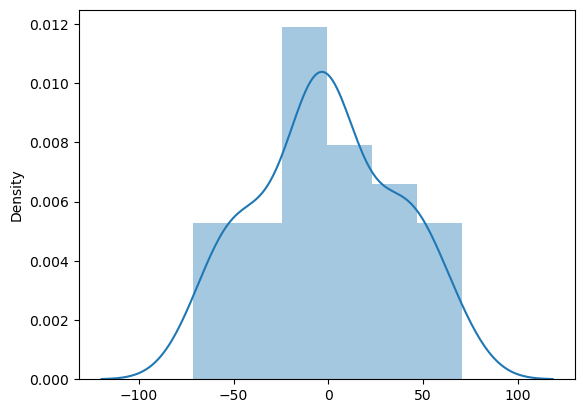

In [42]:
sns.distplot(residuals)
plt.show()

In [43]:
# Since mean of the residual is close to zero. Therfore the model is working well.